# Objectives
- Go deeper into `pandas`, practice a lot
- Practice building models

# Lab
Read in the doctor visit data and experiment with regression.

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("https://s3-us-west-2.amazonaws.com/ga-dat-2015-suneel/datasets/health_data.csv")

In [8]:
df.describe()

,AGE,EDUCATION_YEARS,INCOME_IN_TEN_THOUSANDS,NUM_DOC_VISITS
count,2039.000000,2039.000000,2039.000000,2039.000000
mean,43.846493,11.523324,0.343503,4.022070
std,10.525611,2.348033,0.166108,7.893551
min,25.000000,7.000000,0.040000,0.000000
25%,35.000000,10.500000,0.235000,0.000000
50%,44.000000,10.500000,0.320000,2.000000
75%,52.000000,11.818240,0.420000,4.000000
max,64.000000,18.000000,2.000000,82.000000


In [10]:
df.columns

Index(['AGE', ' EDUCATION_YEARS', ' INCOME_IN_TEN_THOUSANDS',
       ' NUM_DOC_VISITS'],
      dtype='object')

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


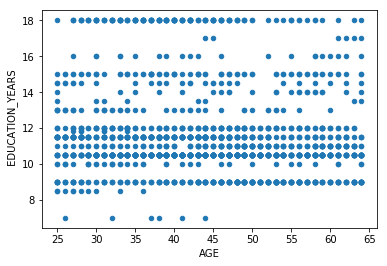

In [12]:
df.plot(x='AGE', y=' EDUCATION_YEARS', kind='scatter')

## Plotting exercise
Create a graph for each feature variable against the target. Target is income.

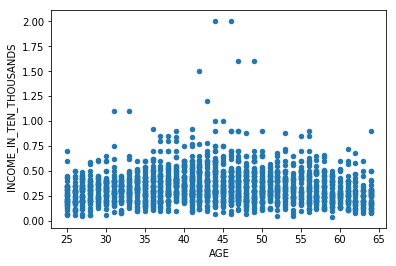

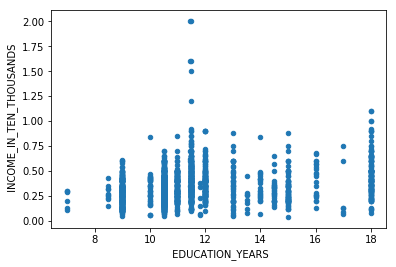

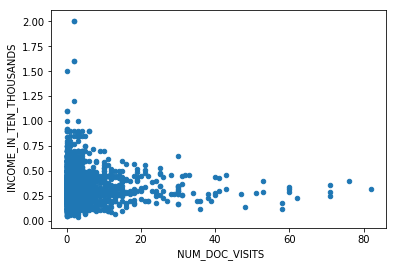

In [14]:
for column in ['AGE', ' EDUCATION_YEARS', ' NUM_DOC_VISITS']:
    df.plot(x=column, y=' INCOME_IN_TEN_THOUSANDS', kind='scatter')

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df[['AGE', ' EDUCATION_YEARS', ' NUM_DOC_VISITS']]

In [18]:
y = df[' INCOME_IN_TEN_THOUSANDS']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [20]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
reg.score(X_train, y_train)

0.05033526976379454

In [22]:
reg.score(X_test, y_test)

0.10182868597107897

## Exercise
Try RandomForestRegressor. How did it do?

Skipping python warmup..

# Pandas mechanics, continued

In [23]:
df = pd.read_csv("https://s3.amazonaws.com/python-level-2/sales-funnel.csv")

In [24]:
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [25]:
df.describe()

,Account,Quantity,Price
count,17.000000,17.000000,17.000000
mean,462254.235294,1.764706,30705.882353
std,259093.442862,1.032558,28444.605609
min,141962.000000,1.000000,5000.000000
25%,218895.000000,1.000000,7000.000000
50%,412290.000000,2.000000,30000.000000
75%,714466.000000,2.000000,40000.000000
max,740150.000000,5.000000,100000.000000


Boolean Mask

In [26]:
is_software = df["Product"] == "Software"

In [29]:
df[is_software]

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented
12,239344,Stokes LLC,Cedric Moss,Fred Anderson,Software,1,10000,presented


## Mini-Exercise
1. What's the total quantity for records where the price is greater than 7000 dollars?
2. What's the standard deviation of the price of records where the product is CPU OR the Rep is Craig Booker?

In [32]:
df[df["Price"] > 7000]["Quantity"].sum()

20

In [33]:
is_cpu = df["Product"] == 'CPU'
is_craig = df['Rep'] == 'Craig Booker'

df[is_cpu | is_craig]['Price'].std()

27757.062983221866

In [34]:
df[(df['Product'] == 'CPU') | (df['Rep'] == 'Craig Booker')]['Price'].std()

27757.062983221866

In [35]:
df.query("Product == 'CPU' | Rep == 'Craig Booker'")['Price'].std()

27757.062983221866

Mean dollar amount for products that (either CPU or Maintenance) AND (status is presented)

In [36]:
df['Amount'] = df['Price'] * df['Quantity']

In [38]:
df['Amount2'] = df.eval("Price * Quantity")

In [40]:
df[
    (df['Product'].isin(['CPU', 'Maintenance'])) &
    (df['Status'] == 'presented')
]['Amount'].mean()

30000.0

## Pivot tables

In [62]:
pd.pivot_table(
    df,
    index=['Product', 'Rep'],
    values=['Amount', 'Quantity'],
    aggfunc={
        'Amount': ['sum', 'mean', 'std'],
        'Quantity': ['sum', 'mean', 'std']
    },
    fill_value=0
)

Amount                        Quantity            \
                             mean            std     sum     mean       std   
Product     Rep                                                               
CPU         Cedric Moss     80000   70710.678119  160000      1.5  0.707107   
            Craig Booker    32500    3535.533906   65000      1.0  0.000000   
            Daniel Hilton  105000   35355.339059  210000      2.0  0.000000   
            John Smith      35000       0.000000   35000      1.0  0.000000   
            Wendy Yule     315000  261629.509039  630000      3.5  2.121320   
Maintenance Cedric Moss      5000       0.000000    5000      1.0  0.000000   
            Craig Booker    10000       0.000000   10000      2.0  0.000000   
            John Smith      10000       0.000000   10000      2.0  0.000000   
            Wendy Yule      21000       0.000000   21000      3.0  0.000000   
Monitor     Wendy Yule      10000       0.000000   10000      2.0  0.000000   
Software    Cedric Moss     10000       0.000000   10000      1.0  0.000000   
            Craig Booker    10000       0.000000   10000      1.0  0.000000   
            Daniel Hilton   10000       0.000000   10000      1.0  0.000000   

                               
                          sum  
Product     Rep                
CPU         Cedric Moss     3  
            Craig Booker    2  
            Daniel Hilton   4  
            John Smith      1  
            Wendy Yule      7  
Maintenance Cedric Moss     1  
            Craig Booker    2  
            John Smith      2  
            Wendy Yule      3  
Monitor     Wendy Yule      2  
Software    Cedric Moss     1  
            Craig Booker    1  
            Daniel Hilton   1

In [88]:
avg_amount_by_product_pvt = pd.pivot_table(
    df, 
    index=["Product"],
    values=["Amount"],
)
avg_amount_by_product = avg_amount_by_product_pvt.reset_index()
avg_amount_by_product.plot(x="Product", y='Amount', kind='bar')

# To Graph a Pivoted DataFrame
1. Make the pivot
2. Reset the index  so it looks like a normal dataframe
3. Do the plot function

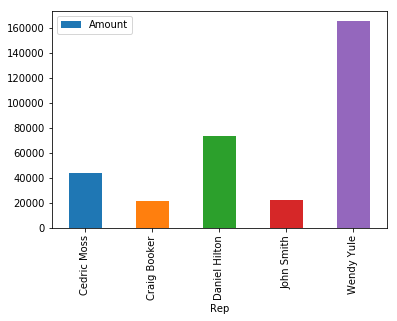

In [89]:
# Tom & Christy's example
pd.pivot_table(df, index=["Rep"], values=['Amount']).reset_index().plot(
    x='Rep', y='Amount', kind='bar')



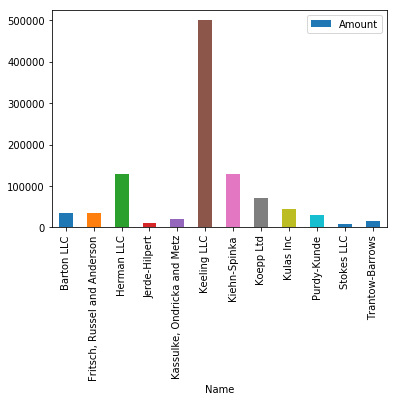

In [91]:
pd.pivot_table(df, index=["Name"], values=['Amount']).reset_index().plot(
    x='Name', y='Amount', kind='bar')

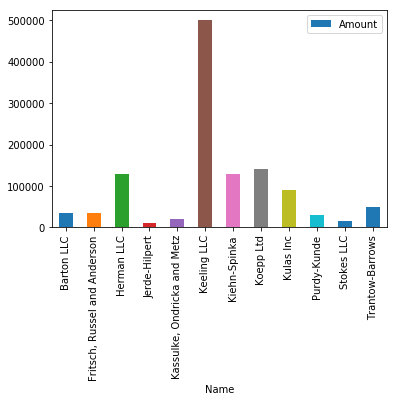

In [92]:
pd.pivot_table(
    df, index=["Name"], values=['Amount'], aggfunc='sum'
).reset_index().plot(
    x='Name', y='Amount', kind='bar')

In [93]:
data = pd.pivot_table(
    df, index=["Rep", "Status"], values=['Amount'], aggfunc='sum'
).reset_index()

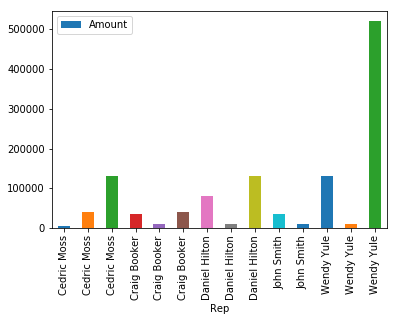

In [95]:
data.plot(x='Rep', y='Amount', kind='bar')

## Assignment
1. Read in rock song data
2. Do some EDA (exploratory data analysis)
3. Find out how many songs were released in 1981
4. What's the earliest release year?

In [96]:
df = pd.read_csv(
    "https://s3-us-west-2.amazonaws.com/ga-dat-2015-suneel/rock.csv"
)

In [99]:
df.dtypes

Song Clean      object
ARTIST CLEAN    object
Release Year    object
COMBINED        object
First?           int64
Year?            int64
PlayCount        int64
F*G              int64
dtype: object

In [98]:
df.describe()

,First?,Year?,PlayCount,F*G
count,2230.0,2230.000000,2230.000000,2230.000000
mean,1.0,0.741256,16.872646,15.048430
std,0.0,0.438043,25.302972,25.288366
min,1.0,0.000000,0.000000,0.000000
25%,1.0,0.000000,1.000000,0.000000
50%,1.0,1.000000,4.000000,3.000000
75%,1.0,1.000000,21.000000,18.000000
max,1.0,1.000000,142.000000,142.000000


In [100]:
df[df['Release Year'] == '1981'].count()

Song Clean      61
ARTIST CLEAN    61
Release Year    61
COMBINED        61
First?          61
Year?           61
PlayCount       61
F*G             61
dtype: int64

In [101]:
df['Release Year'].unique()

array(['1982', nan, '1981', '1980', '1975', '2000', '2002', '1992',
       '1985', '1993', '1976', '1995', '1979', '1984', '1977', '1990',
       '1986', '1974', '2014', '1987', '1973', '2001', '1989', '1997',
       '1971', '1972', '1994', '1970', '1966', '1965', '1983', '1955',
       '1978', '1969', '1999', '1968', '1988', '1962', '2007', '1967',
       '1958', '1071', '1996', '1991', '2005', '2011', '2004', '2012',
       '2003', '1998', '2008', '1964', '2013', '2006', 'SONGFACTS.COM',
       '1963', '1961'], dtype=object)

## Exercise
Write a function `clean_year`

`value` is a String
```
def clean_year(value):
    ....
    return cleaned_value
```

If it's less than 1900, return None
If it's not an integer, return None

In [102]:
def clean_year(value):
    if type(value) != int:
        return None
    if year < 1900:
        return None
    return value

In [112]:
def clean_year(value):
    try:
        value_int = int(value)
    except ValueError:
        return None
    if value_int < 1900:
        return None
    return value_int

In [117]:
def clean_year(value):
    try:
        value_int = int(value)
    except ValueError:
        return

    if value_int >= 1900:
        return value_int

In [122]:
df['clean_year'] = df['Release Year'].apply(clean_year)

In [123]:
df.dtypes

Song Clean       object
ARTIST CLEAN     object
Release Year     object
COMBINED         object
First?            int64
Year?             int64
PlayCount         int64
F*G               int64
clean_year      float64
dtype: object

In [124]:
df['first_word_of_song']  = df['Song Clean'].apply(lambda v: v.split()[0])

In [126]:
df[['Song Clean', 'first_word_of_song']].head()

,Song Clean,first_word_of_song
0,Caught Up in You,Caught
1,Fantasy Girl,Fantasy
2,Hold On Loosely,Hold
3,Rockin' Into the Night,Rockin'
4,Art For Arts Sake,Art


# Now... the twitter data

In [3]:
import pandas as pd
df = pd.read_csv(
    "https://s3-us-west-2.amazonaws.com/ga-dat-2015-suneel/datasets/clean_twitter_data.csv",
    nrows=50000
)

In [4]:
df.count()

Sentiment        50000
SentimentText    50000
dtype: int64

## Features
Brainstorm features we could easily create.
- number_exclamations
- percentage_of_uppercase_characters
- contains_smiley_face
- length_of_the_tweet
- percentage_of_punctuation
- contains_negative_words

Given that you've added columns, use them as features for a NaiveBayesClassifier. `Sentiment` is the target.

In [145]:
NEGATIVE_WORDS = ['damn']

df['contains_negative_words'] = df['SentimentText'].str.contains(
    '|'.join(NEGATIVE_WORDS))

#del df['col to delete']

In [7]:
corpus = df['SentimentText']

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [9]:
y = df['Sentiment']

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
forest = RandomForestClassifier()

In [15]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
forest.score(X_test, y_test)

0.70824

# Let's model CC defaults


In [17]:
df = pd.read_csv("https://s3-us-west-2.amazonaws.com/simplefractal-teaching/cc_default.csv")

In [18]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Lab
1. Build classifier using all the ones we've learned so far  to predict whether or not someone will default.
2. Tune them (e.g. change n_neighbors, n_estimators, etc etc)
3. Which performed the best?